# 数据可视化(seaborn篇)
seaborn可以看作是matplotlib补充工具，提供大量图形的api接口

In [134]:
!pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [135]:
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [136]:
# 准备画图数据  

from sklearn.datasets import load_iris
data = load_iris()
X = data["data"]
y = data["target"]
columns = ["sepal_length","sepal_width","petal_length","petal_width"]
category = {0:'setosa', 1:'versicolor', 2:'virginica'}

import pandas as pd
X = pd.DataFrame(X, columns=columns)
y = pd.Series(y,name="category")
# print(X.head())
# print(y.head())
data = pd.concat([X,y],axis=1).reset_index(drop=True)
# data["category"] = data.category.map(category)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


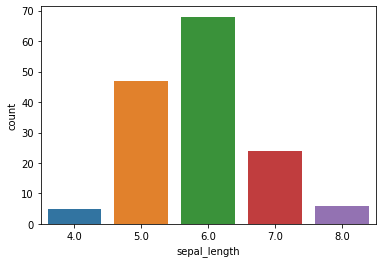

In [137]:
# pandas的bar，在sns里可以认为是countplot，但是不需要对数据value_counts
sns.countplot(data["sepal_length"].round())

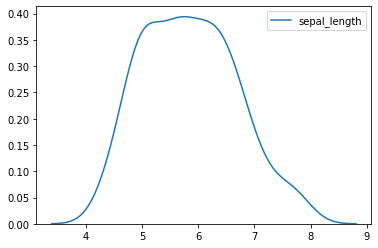

In [138]:
# kde相当于pandas的line图, 但是对数据做了平滑处理，outliner和骤变的数据被剔除
# 一般情况下对区间数据，我们希望看到平滑后的趋势
# 对于类别的数据，平滑可能带来负面效果
# 注意：有时候我们并不需要这种平滑
sns.kdeplot(data["sepal_length"])

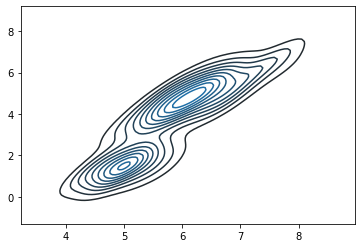

In [139]:
# 对于二元数据，kde图
sns.kdeplot(data.loc[:,["sepal_length","petal_length"]])

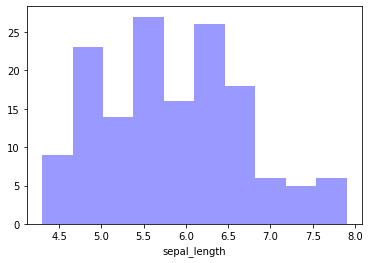

In [140]:
# sns的直方图，注意选择条形数量bins，这里没有显示数据走势kde图
sns.distplot(data['sepal_length'], bins=10, kde=False, color="blue")

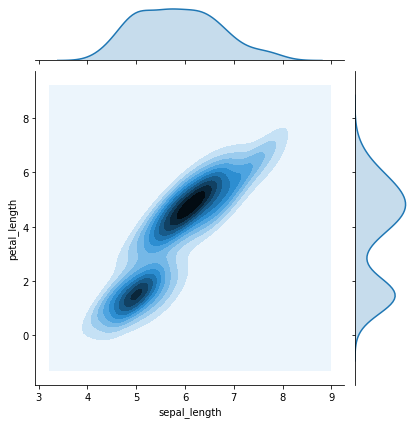

In [141]:
# 对于两个变量的数据,kind参数可以指定使用的图形类型，例如kde，hex，默认散点图
sns.jointplot(x='sepal_length', y='petal_length', data=data,kind="kde")

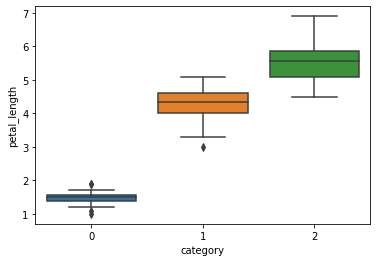

In [142]:
# 箱图，主要用来检查离群点，注意这里需要数据满足正态分布才能检测
# 注意：横坐标选的花朵分类
sns.boxplot(x='category', y='petal_length', data=data)

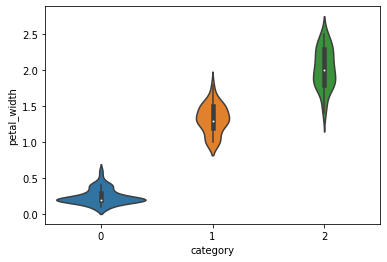

In [143]:
# 箱图还不够直观显示数据的分布， violinplot其实对每类的数据做kdeplot
# 可以看到花朵0类的petal length满足典型的正态分布
sns.violinplot(x='category',y='petal_width',  data=data)

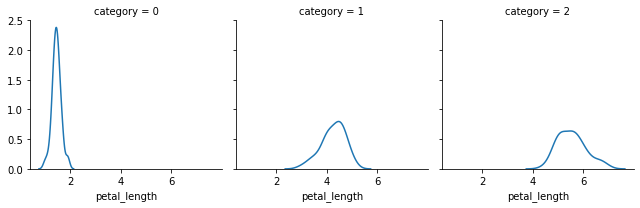

In [144]:
# 当需要对数据按照某一/多个类别进行划分，并且一同展示时，facetgrid
# col_wrap可以指定一行有多少列图片
g = sns.FacetGrid(data, col="category",col_wrap=3)
g.map(sns.kdeplot,"petal_length")

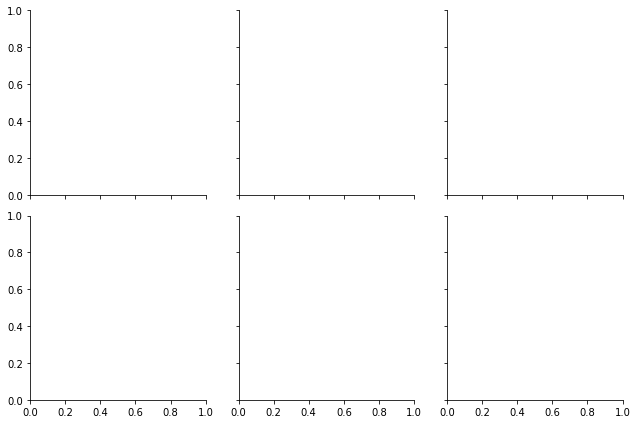

In [145]:
# 如果同时有两种类别作为划分图片的依据
# 此例会报错，因为sepal_length=1,category=3的数据不存在
data["sepal_length"] = (data["sepal_length"]<5.5).astype(int)
data["sepal_length"]
g = sns.FacetGrid(data, row="sepal_length", col="category")
# g.map(sns.kdeplot,"petal_length")
# sns.violinplot

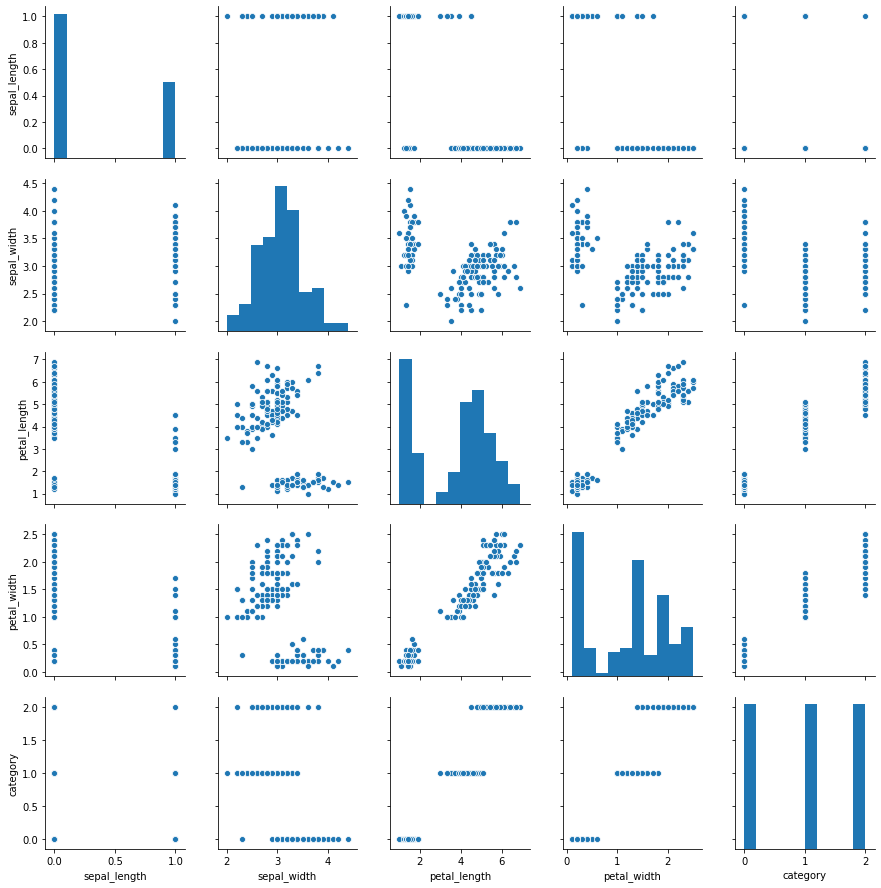

In [149]:
# 当需要对数据做两两特征分布分析时，paireplot
# 对角线图形是某一特征的分布图，默认使用直方图
# 可以指定对角线使用图类型，同时图形类型默认kind=scatter
# sns.pairplot(data, diag_kind="kde")
sns.pairplot(data)